# Analysis of the connectivity of hydrides within the microstructure of Zr alloys

###            Group 2: Jamie McGregor, Enn Veikesaar,  Wunmi Olukoya and Laura Gonzalez

## Aims

A program that can :
 
- `Identify`: an image of a micrograph 
- `Process`: the image to only relevant area
- `Calculate`: Identify Hydride connectivity in microstructure  
- `Verification`: Apply comprehensive testing to support confidence of code  

## Import Packages

In [9]:
# We import the packages we need
from matplotlib import pyplot as plt
import re
from PIL import Image
import os, os.path
from os import listdir
import matplotlib.axes
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage import morphology
import numpy as np

# And also we import the functions we have created
from packages import loading
from packages import processing
from packages import connectivity
from packages import parameters
from packages import image_count
from pacakges import image_clean_up
from packages import Gaussian_thresholding

## Image loading

In this section the image is imported and loaded

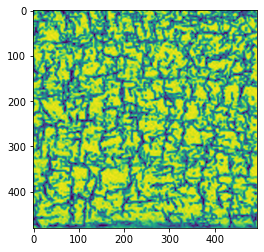

In [2]:
# The sorted_alphanumeric function loads the images and sorts them 

mypath = './Micrographs/'
def_files = loading.sorted_aphanumeric(listdir(mypath))

# The data of the image that is going to be analysed are storaged in the "img" variable
img = cv2.imread('./Micrographs/chu7.jpg',0)

# And the original image is plotted here
imgplot = plt.imshow(img)

## Image Processing

The images gained from the raw data is read with a BGR code through opencv instead of a RGB code. This doesn't matter as we will be transforming them into black and white images eventually. Due to the large area of the images being analysed, any standard connectivity methods will not work as every projection will have at least one hydride shadow. Therefore, we begin by breaking the image into vertical strips to reduce the interference on measuring the presence and continuity of radial hydrides. Following from this, we blur the strips and save them in their own directorys.

The function "vertical_strips" confirms that the total width of the image can be split into the defined number 
of sections (SecNum). If not, the number of slides will be increased by 1 until equality is achieved. And then, 
this function slices vertically the image in equal widths and return the number of strips.  

In [3]:
SecNum = 15 # Define an initial number of vertical strips 
strips=processing.vertical_strips(SecNum,img) # We save the number of strips that we calculated
                                              # with the vertical_strips function

The blur function applies blurring to the vertical strips to reduce the noise and transform them to grayscale. It also rejoin the strips to be able to plot the image we got so far   

numpy.ndarray

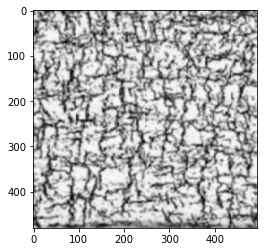

In [4]:
cv2.imwrite('ImagePrep/BlurJoined.png', processing.blur(strips)) # The image returned from the blur 
                                                                 # function is stored as "BlurJoined"
plt.imshow(mpimg.imread('ImagePrep/BlurJoined.png')) # We plot the image we have so far to check the procedure
type(processing.blur(strips))

## Thresholding

This stage is to transform the graysacale and blurred image to be totally binary, and then 3 different thresholding methods are applied to see which one works best.

#### Otsu thresholding

The function "otsu" automatically detects the otsu thresholding value and applies it to the image.

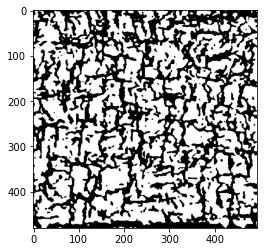

In [5]:
cv2.imwrite('Thresholding/OtsuThresh.png', connectivity.otsu(strips)) # The image returned from this function is stored
                                                                      # as "OtsuThresh" in a folder called "Thresholding"                                      
    
plt.imshow(mpimg.imread('Thresholding/OtsuThresh.png'))  # The filtered image is shown here

#### K-means thresholding

The function "kmeans" automatically detects the K-means thresholding value and applies it to the image.

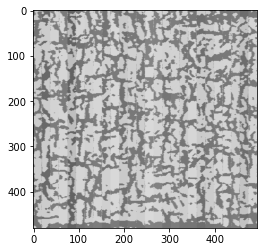

In [6]:
cv2.imwrite("Thresholding/KThresh.png", connectivity.kmeans(strips)) # The image returned from this function is stored as "KTresh" in 
                                                        # a folder called "Thresholding"

plt.imshow(mpimg.imread('Thresholding/KThresh.png'))    # The filtered image is shown here

#### Gaussian thresholding

The functions image_clean_up and Gaussian_thresholding binarize the image using Gaussian thresholding and then remove excess noise through two different methods. Combining the two methods is also tested. 

OpenCV uses an area thresholding method, where isolated pixel islands with a specified empirical minimum size are removed from the image. 

skimage uses an erosion and dilation treatment to remove small areas of noise from the image.

Due to the inconsistent quality of thresholding obtained by this method, the images obtained here were excluded from HCC analysis.

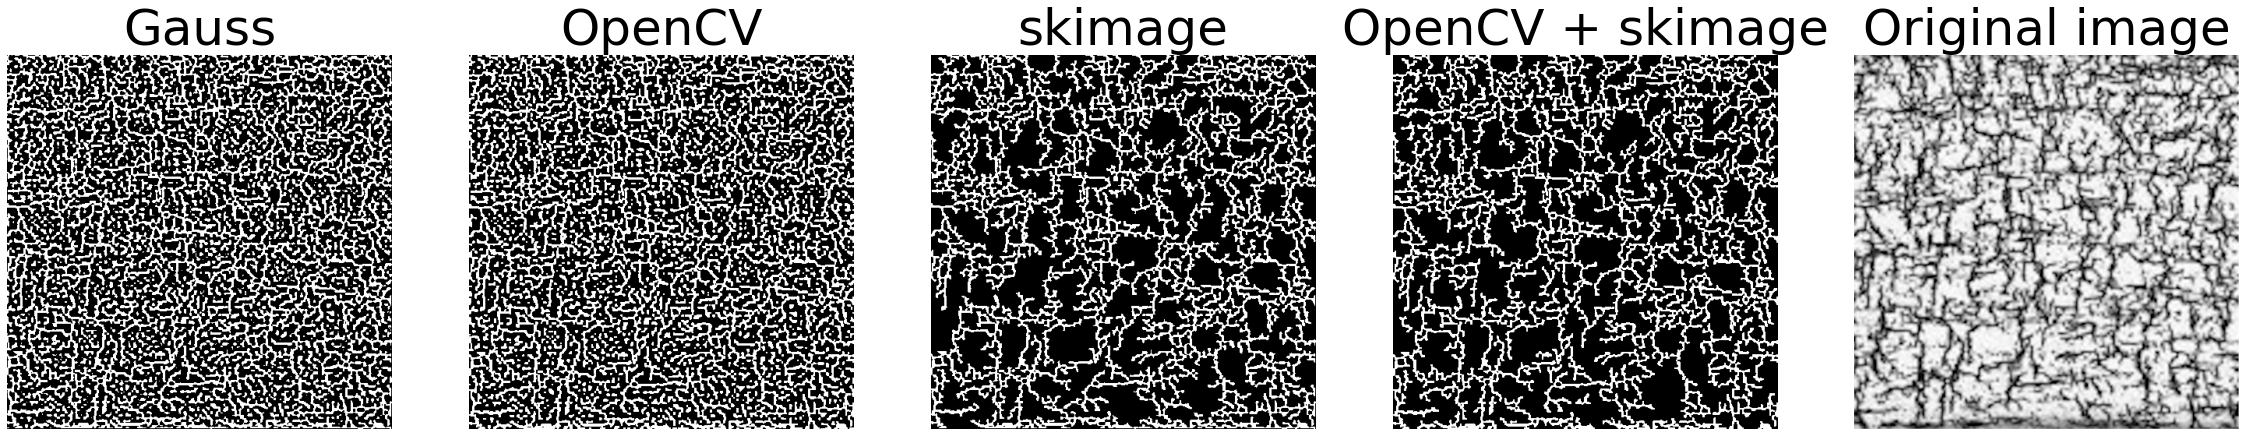

In [8]:
image_clean_up(Gaussian_thresholding(mypath)[0], Gaussian_thresholding(mypath)[1]) #Run the function to process the images.

## Connectivity of Microstructure 

In this section, firstly the connectivity between hydrides in the radial direction is studied. Secondly, using the literature review, the formula for the HCC was discovered and applied in the functions called below.

The function "edges" uses at the same time other function called "auto_canny", which applies automatic Canny edge detection using the computed median of the single channel pixel intensities. So the "edges" function is able to detect the hydrides of the image for both thresholds.

#### Connectivity of Otsu thresholding

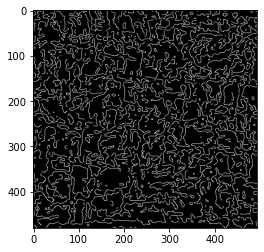

In [7]:
cv2.imwrite("Edges/CannyOtsu.png", connectivity.edges(strips)[0])  # The image returned from this function is stored 
                                                                   # as "CannyOtsu" in a folder called "Edges"
    
plt.imshow(mpimg.imread('Edges/CannyOtsu.png'))       # The connectivity of the hydrides is shown here


#### Connectivity of k-means thresholding

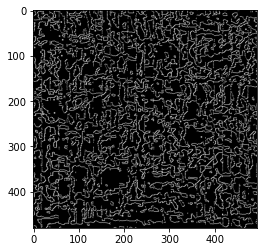

In [8]:
cv2.imwrite("Edges/CannyKmeans.png", connectivity.edges(strips)[1])  # The image returned from this function is stored
                                                                     # as "CannyKmeans" in a folder called "Edges"
    
plt.imshow(mpimg.imread('Edges/CannyKmeans.png'))       # The connectivity of the hydrides is shown here

Now that we have localised the hydrides, we calculate the Hidride Ccontinuity Coefficient (HCC) by using the functions "HCC1" and "HCC2"

#### HCC calculation - Method 1

The HCC1 function calculates the HCC value of every single pixel column and averages all the resulting HCC values

In [9]:
HydrideOtsu = 0          # We start to count from the hydride number 0
HydrideKmeans = 0        # We start to count from the hydride number 0
parameters.HCC1(HydrideOtsu, HydrideKmeans)

Otsu HCC:  0.10950995276653178 
 K-means HCC:  0.1300733805668017


#### HCC calculation - Method 2

The HCC2 function uses the edge detection images to discover the contours within every strip and then measures the HCC of the slices and averages them across the image.

In [10]:
print("Otsu HCC: " + str(parameters.HCC2(strips)[2]))
print("K-means HCC: " + str(parameters.HCC2(strips)[3]))

Otsu HCC: 0.6532852564102564
K-means HCC: 0.6468750000000001


We plot the images after the HCC calculation using the method 2 to observe the quantity of damage that has been produced to the image during the HCC calculation for each threshold applied.

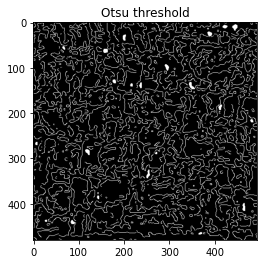

In [11]:
cv2.imwrite('Edges/ContOtsu.png', parameters.HCC2(strips)[0])  # The image returned from this function is stored 
                                                               # as "ContOtsu" in a folder called "Edges"

plt.title("Otsu threshold")
plt.imshow(mpimg.imread('Edges/ContOtsu.png'), label="Otsu")      # The resulting image after the HCC calculation is shown here

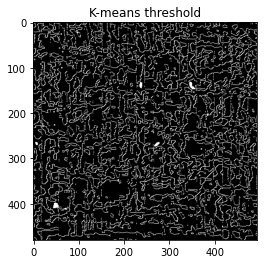

In [12]:
cv2.imwrite('Edges/ContKmeans.png',parameters.HCC2(strips)[1])  # The image returned from this function is stored 
                                                                # as "ContKmenas" in a folder called "Edges"
    
plt.title("K-means threshold")                                                        
plt.imshow(mpimg.imread('Edges/ContKmeans.png'))  # The resulting image after the HCC calculation is shown here